In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [3]:
na_values_df = pd.read_csv("../data/final_dataset.csv")
na_values_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  int64  
 6   imd_band              32545 non-null  float64
 7   age_band              32545 non-null  int64  
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32545 non-null  float64
 12  date_unregistration   32545 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  is_dropout         

In [4]:

X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
y = y.astype(int)

X.shape,  y.shape

((32545, 16), (32545,))

In [5]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10,15]),# feature의 index로 지정.   # index는 앞에 했던 배열로 적용해줘야함.
    ("number_scaler", StandardScaler(), [9,11,12,13,14])    #feature Scaling은 연속형끼리 같은 방식을 사용 (standard or MinMax 중 택1)
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 488169 stored elements and shape (32545, 60)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 55)	3.905125197007625
  (0, 56)	-1.8185928989610989
  (0, 57)	0.6671221427396934
  (0, 58)	-0.1670317117402033
  (0, 59)	0.7100890620793591
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  (1, 53)	1.0
  :	:
  (32543, 40)	1.0
  (32543, 42)	1.0
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 54)	1.0
  (32543, 55)	-1.211159957215567
  (32543, 56)	0.4144516877944941
  (32543, 57)	-1.487791864498921
  (32543, 58)	-0.5562260670917427
  (32543, 59)	1.0137563256706723
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0
  (32544, 51)	1.0
  (32544, 53)	1.0
  (32544, 55)

In [6]:
X = new_merged_df
X = X.astype('float32')
X = X.toarray()
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape

((32545, 60), (32545,))


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
- Complete:5.83658초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.86262초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:3.15067초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:35.08258초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.82468초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.45769초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.36233초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:11.80695초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
- Complete:49.51261초

 >>> Tuning Naive Bayes...
Fitting 5

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:12.14134초
[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                      Best Params  Train Accuracy (CV)  Test Accuracy
           CatBoost         {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.03}             0.900983       0.899370
            XGBoost                    {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899485       0.898448
           LightGBM                    {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}             0.898525       0.896451
      Random Forest                    {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}             0.884660       0.887079
                SVM                                     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}             0.882932       0.886311
Logistic Regression                                    {'C': 0.1, 'penalty': 'l2', 

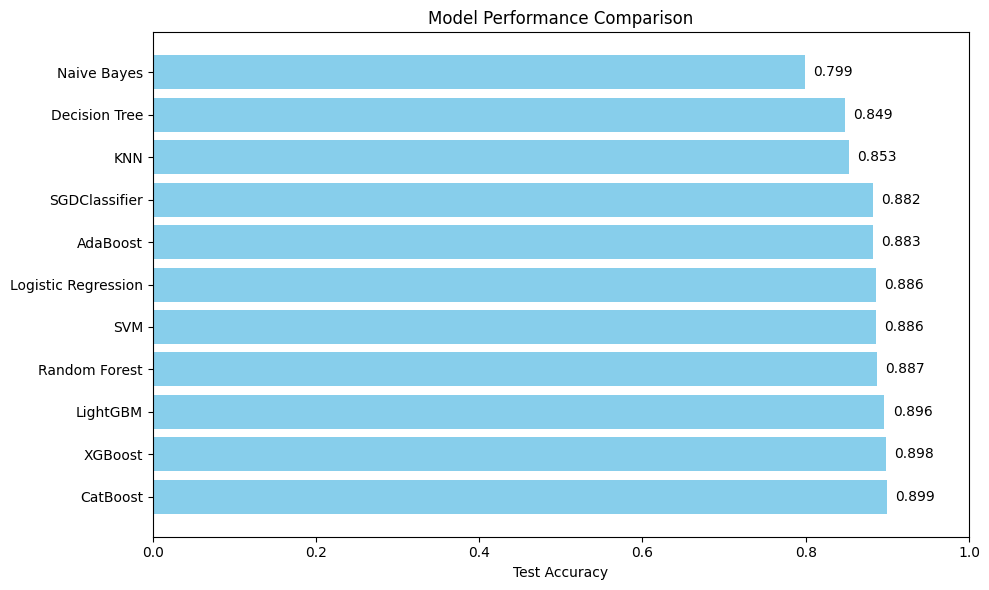


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0    0.79139   0.91983   0.85079      3056
           1    0.91715   0.78540   0.84618      3453

    accuracy                        0.84852      6509
   macro avg    0.85427   0.85262   0.84848      6509
weighted avg    0.85810   0.84852   0.84834      6509



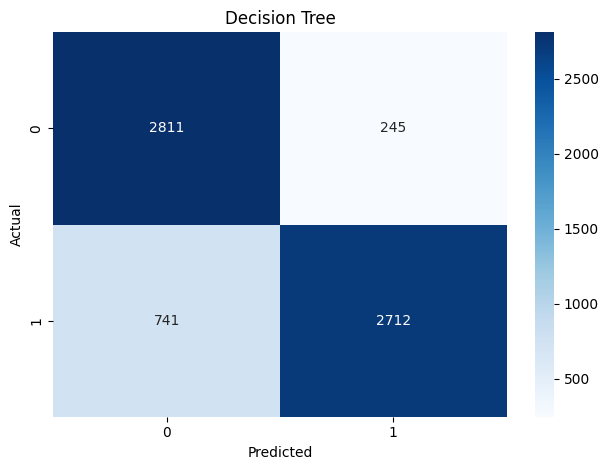


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0    0.83205   0.95157   0.88780      3056
           1    0.95090   0.83000   0.88635      3453

    accuracy                        0.88708      6509
   macro avg    0.89147   0.89079   0.88707      6509
weighted avg    0.89510   0.88708   0.88703      6509



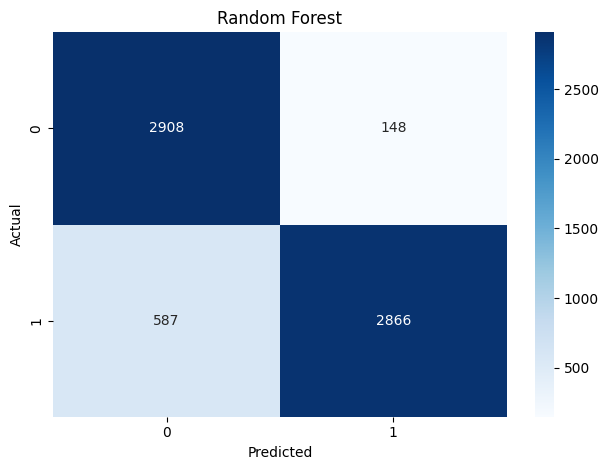


 KNN Best Model Report
              precision    recall  f1-score   support

           0    0.79909   0.91623   0.85366      3056
           1    0.91481   0.79612   0.85135      3453

    accuracy                        0.85251      6509
   macro avg    0.85695   0.85617   0.85250      6509
weighted avg    0.86048   0.85251   0.85243      6509



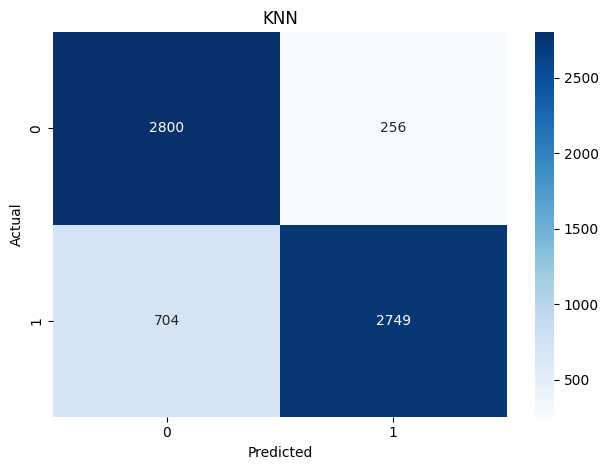


 SVM Best Model Report
              precision    recall  f1-score   support

           0    0.84281   0.93161   0.88499      3056
           1    0.93325   0.84622   0.88761      3453

    accuracy                        0.88631      6509
   macro avg    0.88803   0.88892   0.88630      6509
weighted avg    0.89079   0.88631   0.88638      6509



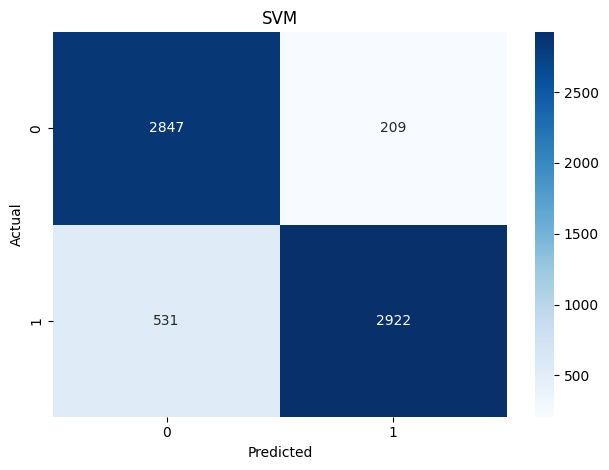


 XGBoost Best Model Report
              precision    recall  f1-score   support

           0    0.86233   0.93259   0.89609      3056
           1    0.93571   0.86823   0.90071      3453

    accuracy                        0.89845      6509
   macro avg    0.89902   0.90041   0.89840      6509
weighted avg    0.90126   0.89845   0.89854      6509



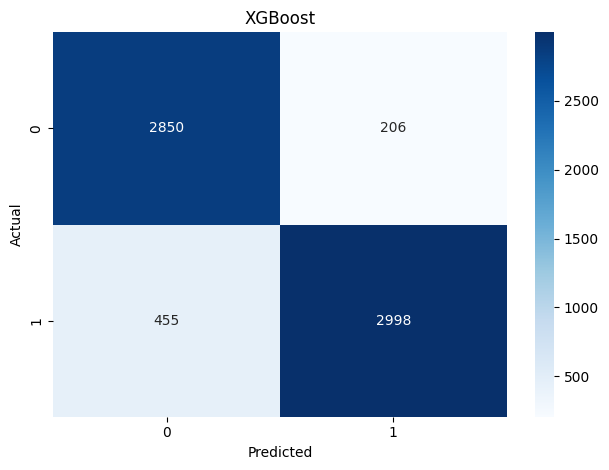


 Logistic Regression Best Model Report
              precision    recall  f1-score   support

           0    0.84712   0.92474   0.88423      3056
           1    0.92751   0.85230   0.88832      3453

    accuracy                        0.88631      6509
   macro avg    0.88732   0.88852   0.88627      6509
weighted avg    0.88977   0.88631   0.88640      6509



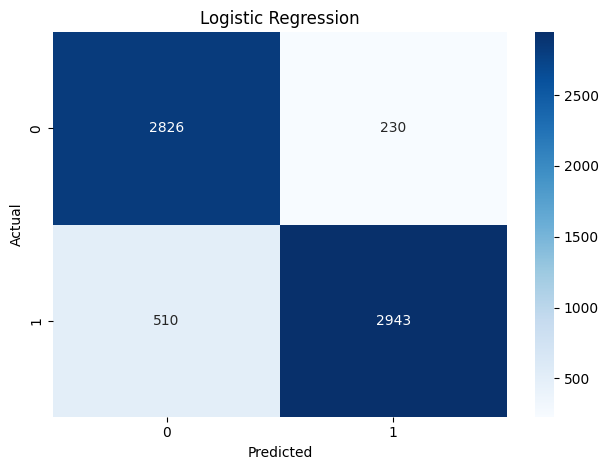


 SGDClassifier Best Model Report
              precision    recall  f1-score   support

           0    0.82709   0.94699   0.88299      3056
           1    0.94618   0.82479   0.88132      3453

    accuracy                        0.88216      6509
   macro avg    0.88664   0.88589   0.88216      6509
weighted avg    0.89027   0.88216   0.88211      6509



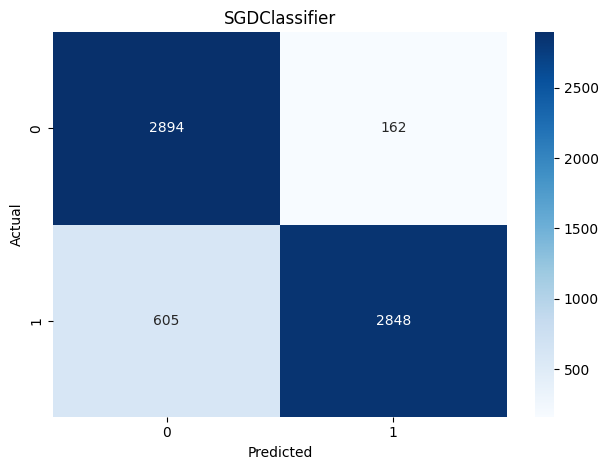


 AdaBoost Best Model Report
              precision    recall  f1-score   support

           0    0.84440   0.91983   0.88050      3056
           1    0.92296   0.84999   0.88497      3453

    accuracy                        0.88278      6509
   macro avg    0.88368   0.88491   0.88274      6509
weighted avg    0.88607   0.88278   0.88287      6509



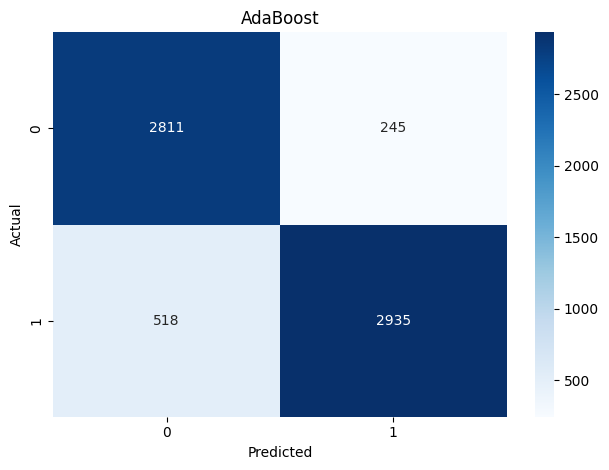


 CatBoost Best Model Report
              precision    recall  f1-score   support

           0    0.86656   0.92866   0.89654      3056
           1    0.93259   0.87344   0.90205      3453

    accuracy                        0.89937      6509
   macro avg    0.89958   0.90105   0.89929      6509
weighted avg    0.90159   0.89937   0.89946      6509



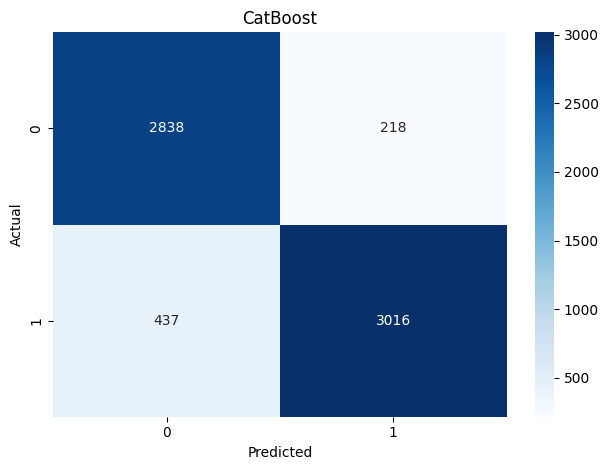


 Naive Bayes Best Model Report
              precision    recall  f1-score   support

           0    0.70267   0.98986   0.82190      3056
           1    0.98593   0.62931   0.76825      3453

    accuracy                        0.79859      6509
   macro avg    0.84430   0.80958   0.79508      6509
weighted avg    0.85294   0.79859   0.79344      6509



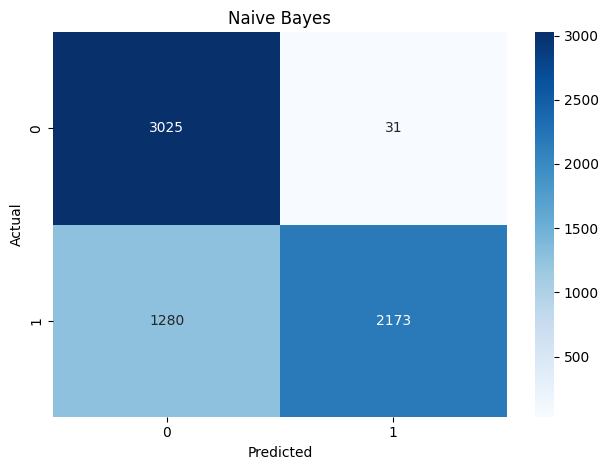


 LightGBM Best Model Report
              precision    recall  f1-score   support

           0    0.86311   0.92637   0.89362      3056
           1    0.93032   0.86997   0.89913      3453

    accuracy                        0.89645      6509
   macro avg    0.89671   0.89817   0.89638      6509
weighted avg    0.89876   0.89645   0.89655      6509



c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


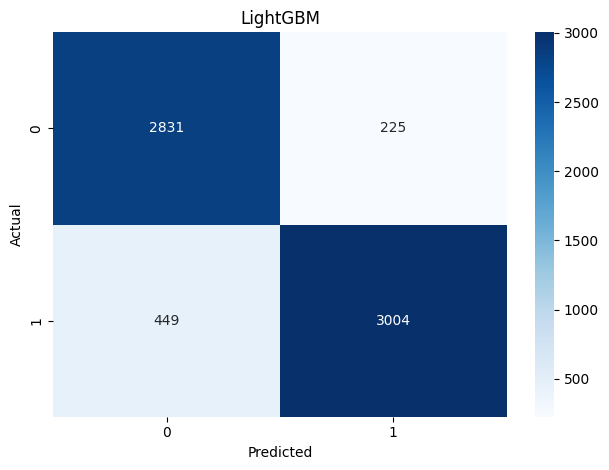

In [13]:
import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42)
    # "MLPClassifier": MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)
}

param_grids = {
    "Decision Tree": {
        "max_depth":range(1, 5),
        "max_leaf_nodes": [3, 5, 10],
        "min_samples_leaf": [2, 5, 10],
        "max_features": [1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50, 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'n_neighbors':[3,5],
        'weights': ['uniform', 'distance']},
    "SVM": {
        'C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'gamma': [0.1], #[0.01, 0.1, 1, 10],
        'kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'C': [0.1],  # 규제 강도
        'penalty': [ 'l2'],  # 규제 유형
        'solver': ['saga']},
    "SGDClassifier": {
        'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'alpha': [ 0.01],  # 규제 계수
        'learning_rate': ['adaptive'],
        'eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "CatBoost": {
        'iterations': [500], #(500, 5001, 500),
        'depth': [4, 5], #range(4,11),
        'learning_rate': [0.03], # [0.01, 0.03, 0.05, 0.1, 0.3],
        'l2_leaf_reg' : [1,3,5] #range(1, 11)
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }
    # "MLPClassifier": {
    #     'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'activation': ['relu', 'tanh'],
    #     'alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'learning_rate_init': [0.001, 0.01],
    #     'batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)